In [1]:
# Generate noisy data samples from linear function y = 3x + 4

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
num_samples =100
x = np.random.rand(num_samples,1)
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

In [9]:
y = 3*x+4
noise = np.random.randn(num_samples,1)

In [10]:
y_withNoise = y + noise

Text(0.5, 1.0, 'Fake data')

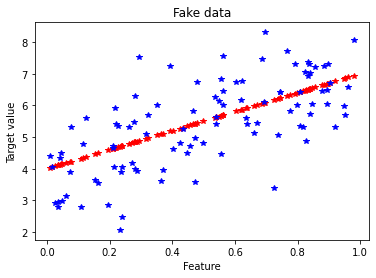

In [17]:
# 2. Visualize our data
plt.plot(x,y,'r*')
plt.plot(x,y_withNoise,'b*')
plt.xlabel('Feature')
plt.ylabel('Target value')
plt.title('Fake data')

In [18]:
# 3. Create training and test data
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y_withNoise,test_size=0.2, random_state=2) # X_train -- feature matrix, y_train -- traget_vector
print("Number of samples in training set is: ",len(X_train))
print("Number of samples in test set is: ",len(X_test))

Number of samples in training set is:  80
Number of samples in test set is:  20


In [23]:
# 4. Train a linear regression model
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

In [24]:
lr_model.fit(X_train,y_train)
print('Slope/Coefficient ',lr_model.coef_)
print('Intercept ',lr_model.intercept_)

Slope/Coefficient  [[3.27768799]]
Intercept  [3.77614018]


In [25]:
y_predict =lr_model.coef_*X_test + lr_model.intercept_

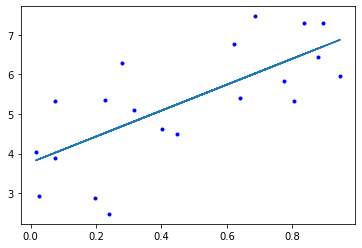

In [27]:
plt.plot(X_test,y_test,'b.')
plt.plot(X_test,y_predict)

In [28]:
# 7. Evaluate model performance on test dataset

In [31]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error is:", mean_absolute_error(y_test,y_predict))

Mean Absolute Error is: 0.8558136724690438


In [32]:
error = y_predict - y_test

In [33]:
error

array([[ 0.49702327],
       [ 0.46549143],
       [-0.94247287],
       [-0.83361587],
       [-0.59799374],
       [-1.30488856],
       [ 0.93922999],
       [-0.2863925 ],
       [ 0.479825  ],
       [-0.78145501],
       [-1.60709297],
       [ 2.0890591 ],
       [ 1.54777417],
       [ 1.07753653],
       [ 0.75836393],
       [-0.21782622],
       [ 0.9102988 ],
       [ 0.12587288],
       [-1.45032847],
       [ 0.20373213]])

In [34]:
from sklearn.metrics import mean_squared_error

print('Mean squared error is: ',mean_squared_error(y_test,y_predict))

Mean squared error is:  1.0013955130409389


In [35]:
# Train and Visualize Ridge Regression Model

ridge_model = linear_model.Ridge(alpha=0.3)
ridge_model.fit(X_train,y_train)
predicted_values = ridge_model.predict(X_test)

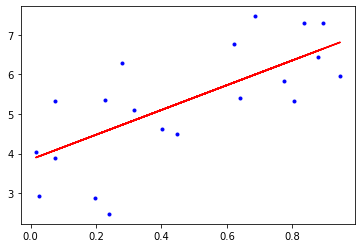

In [42]:
plt.plot(X_test,y_test,'b.')
plt.plot(X_test,predicted_values,'r')

In [37]:
# Train and Visualize Lasso Regression Models

lasso_model = linear_model.Lasso(alpha=0.2)
lasso_model.fit(X_train,y_train)
predict_lasso= lasso_model.predict(X_test)

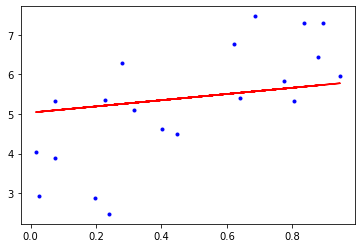

In [41]:
plt.plot(X_test,y_test,'b.')
plt.plot(X_test,predict_lasso,'r')

In [44]:
# Train with polynomial features for ht model

from sklearn.preprocessing import PolynomialFeatures
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [46]:
poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(x) # converting original features

In [47]:
print(x.shape)
print(X_poly.shape)

(100, 1)
(100, 6)


In [49]:
X_polytrain,X_polytest,y_polytrain,y_polytest = train_test_split(X_poly,y_withNoise,test_size = 0.2, random_state=2)

In [50]:
poly_model = linear_model.LinearRegression()
poly_model.fit(X_polytrain,y_polytrain)
predict_poly = poly_model.predict(X_polytest)